In [1]:
# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:

# =========================
# LOAD DATA
# =========================
df = pd.read_csv("./ML471_S2_Datafile_Practice.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop unwanted columns if present
cols_to_drop = ['SMA_10', 'SMA_30', 'SES']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

df.dropna(inplace=True)


In [4]:

# =========================
# DIFFERENCING
# =========================
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True)



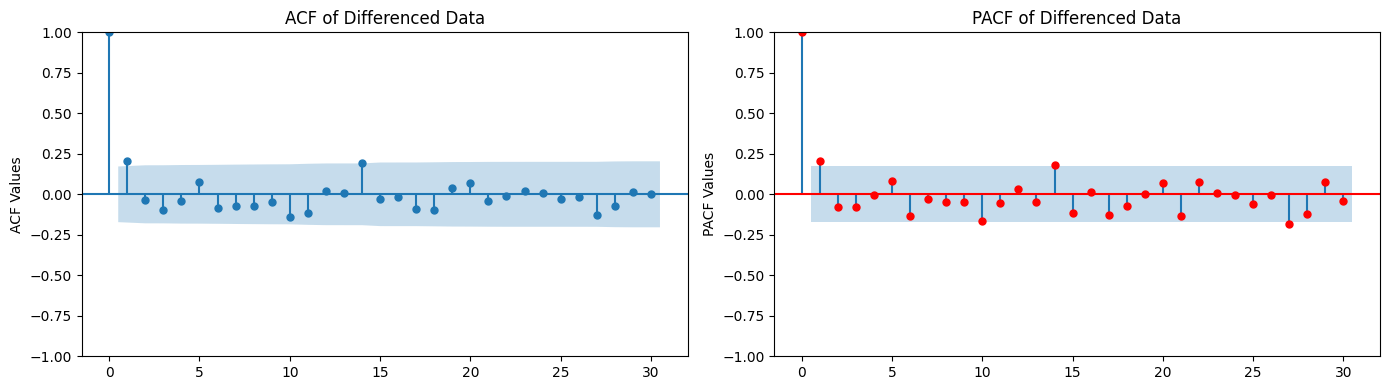

In [7]:

# =========================
# ACF & PACF SIDE-BY-SIDE
# =========================
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF plot (BLUE)
plot_acf(
    df['Close_diff'],
    lags=30,
    ax=axes[0]
)
axes[0].set_title("ACF of Differenced Data")
axes[0].set_ylabel("ACF Values")

# PACF plot (RED)
plot_pacf(
    df['Close_diff'],
    lags=30,
    ax=axes[1],
    method='ywm',
    color='red'
)
axes[1].set_title("PACF of Differenced Data")
axes[1].set_ylabel("PACF Values")

plt.tight_layout()
plt.show()